In [2]:
import pandas as pd  
import numpy as np 
import glob
import matplotlib.pyplot as plt
import cv2
from torch.utils.data import TensorDataset, DataLoader, Dataset
import random

In [5]:
archivePath = 'C:/Users/Diamondman/Downloads/archive'
test_images = glob.glob(archivePath+'/images to test/*')
train = glob.glob(archivePath+'/train/*/*')
test = glob.glob(archivePath+'/test/*/*')
valid  = glob.glob(archivePath+'/valid/*/*')
classes = glob.glob(archivePath+'/train/*')
print(f'Train set size: {len(train)}\nTest set size: {len(test)}\nValidation set size: {len(valid)}\nTotal number of classes: {len(classes)}' )

Train set size: 70646
Test set size: 2250
Validation set size: 2250
Total number of classes: 450


In [9]:
classes_dict ={}
for i in range(len(classes)):
    classes_dict[classes[i].split('\\')[-1]] = 0
for i in range(len(train)):
    classes_dict[train[i].split('\\')[-2]] +=1 
#Creating a dataframe of the classes and their corresponding img count
df = pd.DataFrame(classes_dict.items(), columns=['class_name', 'count']) 
display(df.head())
display(df.describe())

,class_name,count
0,ABBOTTS BABBLER,166
1,ABBOTTS BOOBY,180
2,ABYSSINIAN GROUND HORNBILL,179
3,AFRICAN CROWNED CRANE,137
4,AFRICAN EMERALD CUCKOO,154


,count
count,450.000000
mean,156.991111
std,17.428567
min,130.000000
25%,144.000000
50%,155.000000
75%,163.000000
max,248.000000


In [10]:
images_dict ={'height':[], 'width':[], 'chanles':[], 'class_name':[], 'image_name':[]}
for path in train:
    img = cv2.imread(path)
    h, w, c = img.shape
    images_dict['height'].append(h)
    images_dict['width'].append(w)
    images_dict['chanles'].append(c)
    images_dict['class_name'].append(path.split('\\')[-2])
    images_dict['image_name'].append(path.split('\\')[-1])
images_df =pd.DataFrame(images_dict)

In [11]:
images_df.describe()

,height,width,chanles
count,70646.000000,70646.000000,70646.0
mean,223.999604,223.999236,3.0
std,0.105345,0.203166,0.0
min,196.000000,170.000000,3.0
25%,224.000000,224.000000,3.0
50%,224.000000,224.000000,3.0
75%,224.000000,224.000000,3.0
max,224.000000,224.000000,3.0


In [12]:
images_df.nunique()

height          2
width           2
chanles         1
class_name    450
image_name    347
dtype: int64

In [13]:
images_df.height.value_counts()

224    70645
196        1
Name: height, dtype: int64

In [41]:
# outlier size 
images_df[(images_df.width != 224)| (images_df.height != 224)]

,height,width,chanles,class_name,image_name
46640,196,170,3,LOGGERHEAD SHRIKE,166.jpg


In [35]:
df = images_df.groupby(['class_name'])['class_name'].count()
df.rename()
df.sort_values(ascending = False,inplace=True)


In [38]:
df

class_name
HOUSE FINCH                248
D-ARNAUDS BARBET           233
OVENBIRD                   233
SWINHOES PHEASANT          217
WOOD DUCK                  214
                          ... 
BLACK FRANCOLIN            131
AMETHYST WOODSTAR          131
PATAGONIAN SIERRA FINCH    130
RED TAILED THRUSH          130
SNOWY PLOVER               130
Name: class_name, Length: 450, dtype: int64

In [33]:
df.rename( columns={'Unnamed: 0':'new column name'}, inplace=True )

TypeError: rename() got an unexpected keyword argument 'columns'

In [7]:
#Sorting the dataframe by the count of the images
df = images_df.groupby(['class_name'])['class_name'].count()
df.sort_values(ascending = False, inplace=True)
# df.reset_index(drop = True, inplace = True)  
#basic statistics of the classes  
# stats = df.describe()
#Defining outliers as classes that surpass the 75th percentile +- 1.5*IQR
high_ourliers = df["class_name"][df["count"] > stats["count"]["75%"] + 1.5 * (stats["count"]["75%"] - stats["count"]["25%"])].values
low_ourliers = df["class_name"][df["count"] < stats["count"]["25%"] - 1.5 * (stats["count"]["75%"] - stats["count"]["25%"])].values
#Print the results
print("High outliers: ", high_ourliers)
print("Low outliers: ", low_ourliers)

High outliers:  ['HOUSE FINCH' 'D-ARNAUDS BARBET' 'OVENBIRD' 'SWINHOES PHEASANT'
 'WOOD DUCK' 'CASPIAN TERN' 'OYSTER CATCHER' 'DARK EYED JUNCO'
 'RED TAILED HAWK' 'VIOLET GREEN SWALLOW' 'SORA' 'CRIMSON SUNBIRD'
 'RED BEARDED BEE EATER' 'CAMPO FLICKER' 'MARABOU STORK' 'NORTHERN PARULA'
 'RAZORBILL' 'BANDED BROADBILL' 'VARIED THRUSH' 'SPOONBILL']
Low outliers:  []


Text(0, 0.5, 'frequency')

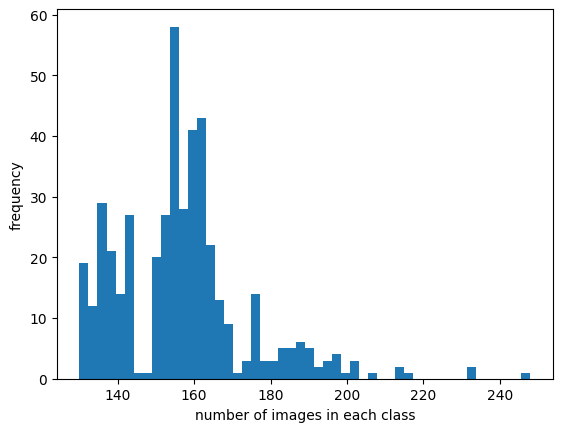

In [94]:
# classes distibution
plt.hist(images_df.groupby(['class_name'])['class_name'].count(), bins=50 )
plt.xlabel('number of images in each class')
plt.ylabel('frequency (how many classes)')


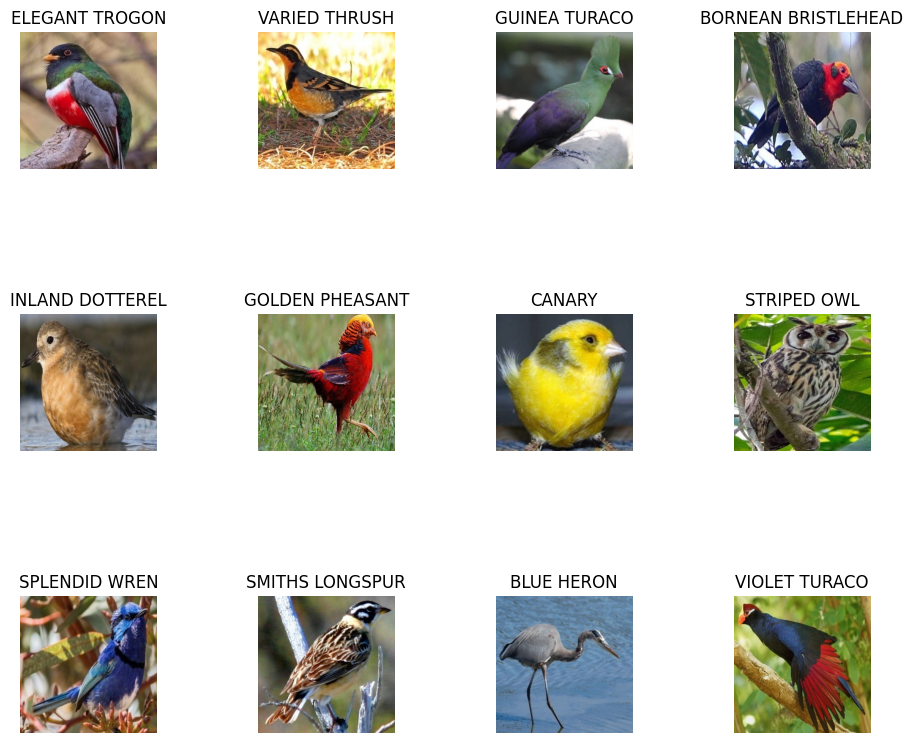

In [92]:
images = []
fig = plt.figure(figsize=(10, 7))
sample = random.sample(train,12)
for i, image in enumerate(sample):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(3, 4, i+1)
    fig.tight_layout(pad=5.0)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image.split('\\')[-2])
    if i > 10:
        break

# summary 
a
* Train set size: 70646
* Test set size: 2250
* Validation set size: 2250
* Total number of classes: 450

b
* W need to resize one image in train set which is smaller, (196,170) instead of (224,224).
* Classes distribution is not equal. (as we can see in histogarm)
*  Using image augmentation can be useful for categories that have small amount of training samples compere to others. in addition, if we notice during training that there are some categories that are harder to seprate we most think of agumentation that will help the model to be more genralized.
Augmention may can use: random croping, rotating (limited angle of -+20), horizontally flipping, brightness, noise, GaussianBlur.

c
* As we can see from histogram there are some classes with 200 and more samples and some classes with less then 140.

d
* There are many benchmarkes for diffrent models in kaggle


